In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [3]:
def str_to_num(string):
    return int(string.split(" ")[1])

In [36]:
event = pd.read_csv('event_type.csv',error_bad_lines=False)
# remove bad data, index 31170
event = event.drop(index=31170,axis=1)
event.to_csv('event_type2.csv',index=False)

resource = pd.read_csv('resource_type.csv',error_bad_lines=False)
# remove bad data, index 21076
resource = resource.drop(index=21076)
resource.to_csv('resource_type2.csv',index=False)

b'Skipping line 31173: expected 2 fields, saw 3\nSkipping line 31174: expected 2 fields, saw 3\nSkipping line 31175: expected 2 fields, saw 3\nSkipping line 31176: expected 2 fields, saw 3\nSkipping line 31177: expected 2 fields, saw 3\nSkipping line 31178: expected 2 fields, saw 3\nSkipping line 31179: expected 2 fields, saw 3\nSkipping line 31180: expected 2 fields, saw 3\nSkipping line 31181: expected 2 fields, saw 3\nSkipping line 31182: expected 2 fields, saw 3\nSkipping line 31183: expected 2 fields, saw 3\nSkipping line 31184: expected 2 fields, saw 3\nSkipping line 31185: expected 2 fields, saw 3\nSkipping line 31186: expected 2 fields, saw 3\nSkipping line 31187: expected 2 fields, saw 3\nSkipping line 31188: expected 2 fields, saw 3\nSkipping line 31189: expected 2 fields, saw 3\nSkipping line 31190: expected 2 fields, saw 3\nSkipping line 31191: expected 2 fields, saw 3\nSkipping line 31192: expected 2 fields, saw 3\nSkipping line 31193: expected 2 fields, saw 3\nSkipping li

b'Skipping line 21079: expected 2 fields, saw 3\nSkipping line 21080: expected 2 fields, saw 3\nSkipping line 21081: expected 2 fields, saw 3\nSkipping line 21082: expected 2 fields, saw 3\nSkipping line 21083: expected 2 fields, saw 3\nSkipping line 21084: expected 2 fields, saw 3\nSkipping line 21085: expected 2 fields, saw 3\nSkipping line 21086: expected 2 fields, saw 3\nSkipping line 21087: expected 2 fields, saw 3\nSkipping line 21088: expected 2 fields, saw 3\nSkipping line 21089: expected 2 fields, saw 3\nSkipping line 21090: expected 2 fields, saw 3\nSkipping line 21091: expected 2 fields, saw 3\nSkipping line 21092: expected 2 fields, saw 3\nSkipping line 21093: expected 2 fields, saw 3\nSkipping line 21094: expected 2 fields, saw 3\nSkipping line 21095: expected 2 fields, saw 3\nSkipping line 21096: expected 2 fields, saw 3\nSkipping line 21097: expected 2 fields, saw 3\nSkipping line 21098: expected 2 fields, saw 3\nSkipping line 21099: expected 2 fields, saw 3\nSkipping li

In [42]:
test = pd.read_csv('test.csv',index_col='id',converters={'location':str_to_num})
train = pd.read_csv('train.csv',index_col='id',converters={'location':str_to_num})
events = pd.read_csv('event_type2.csv',converters={'location':str_to_num})
log = pd.read_csv('log_feature.csv',converters={'log_feature':str_to_num})
resource = pd.read_csv('resource_type2.csv',error_bad_lines=False)
severity = pd.read_csv('severity_type.csv',index_col='id',converters={'severity_type':str_to_num})

In [45]:
df = train.append(test)

C:\Users\jthe\Anaconda3\envs\spatial\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [55]:
print(df.shape)
print(train.shape)
print(test.shape)

(18552, 2)
(7381, 2)
(11171, 1)


Data visualisation - location, id, and severity
   *  Severity 2 = red
   *  Severity 1 = blue
   *  Severity 0 = green

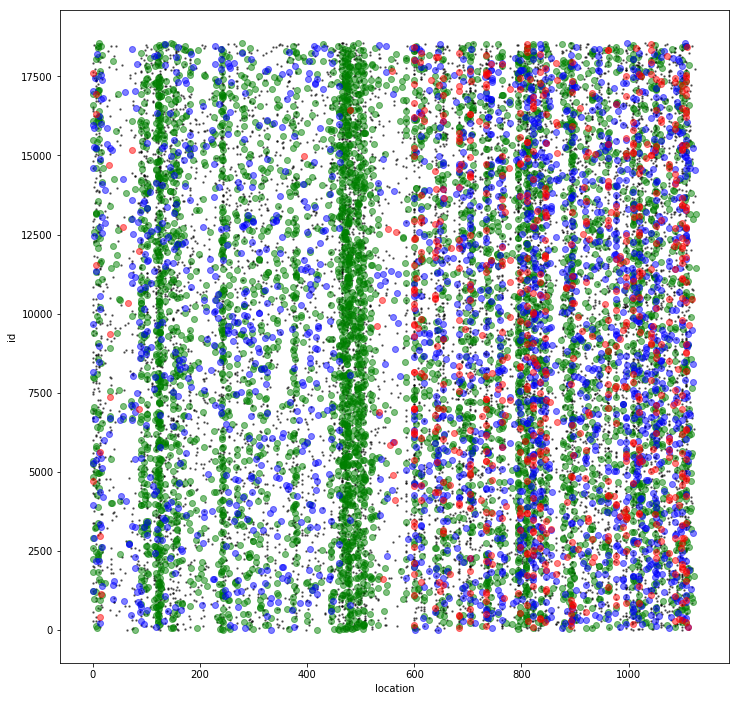

In [62]:
fix, ax = plt.subplots(figsize=(12,12))
ax.scatter(df.loc[df['fault_severity'].isnull(),'location'], df.loc[df['fault_severity'].isnull()].index, alpha=0.5, color = 'k', s=2)
ax.scatter(df.loc[df['fault_severity'] == 0, 'location'], df.loc[df['fault_severity'] == 0].index, alpha=0.5, color = 'g')
ax.scatter(df.loc[df['fault_severity'] == 1, 'location'], df.loc[df['fault_severity'] == 1].index, alpha=0.5, color = 'b')
ax.scatter(df.loc[df['fault_severity'] == 2, 'location'], df.loc[df['fault_severity'] == 2].index, alpha=0.5, color = 'r')
ax.set_xlabel('location')
ax.set_ylabel('id')

From the plot, location potentially could mean something. 
No pattern can be extracted from id - yet

In [90]:
print(df.columns)
print(severity.head(3))
print('-'*30)
print(df.loc[6597,])

Index(['fault_severity', 'location'], dtype='object')
      severity_type
id                 
6597              2
8011              2
2597              2
------------------------------
fault_severity    NaN
location          1.0
Name: 6597, dtype: float64


In [86]:
severity.loc[6597,]

severity_type    2
Name: 6597, dtype: int64

Inspect severity and location

In [94]:
severity_2 = df.join(severity)

In [113]:
severity_2.sort_values(by=['location','id']).head(10)

,fault_severity,location,severity_type
id,,,
282,NaN,1,2
590,NaN,1,2
1233,NaN,1,1
1235,1.0,1,1
1247,0.0,1,1
1505,NaN,1,1
1849,0.0,1,2
2043,NaN,1,2
2250,0.0,1,1


In [111]:
severity_2.sort_values(by=['location'],ascending=False).head(5)

,fault_severity,location,severity_type
id,,,
11436,0.0,1126,1
13149,0.0,1126,1
13712,NaN,1125,2
14544,1.0,1125,1
17719,NaN,1124,1


In [108]:
severity_2.loc[[6597,8011,1989],]

,fault_severity,location,severity_type
id,,,
6597,NaN,1,2
8011,0.0,1,2
1989,NaN,999,1


In [116]:
severity_2[severity_2['location'] == 1].sort_values(by=['id'])

,fault_severity,location,severity_type
id,,,
282,NaN,1,2
590,NaN,1,2
1233,NaN,1,1
1235,1.0,1,1
1247,0.0,1,1
1505,NaN,1,1
1849,0.0,1,2
2043,NaN,1,2
2250,0.0,1,1


In [122]:
severity_2.loc[6597,:]

fault_severity    NaN
location          1.0
severity_type     2.0
Name: 6597, dtype: float64

Assumption is rows are sorted time based. lets check it out if that's the case

In [125]:
severity_2['cnt'] = severity_2.groupby('location').cumcount() + 1
severity_2.head(5)

,fault_severity,location,severity_type,cnt
id,,,,
14121,1.0,118,2,1
9320,0.0,91,2,1
14394,1.0,152,2,1
8218,1.0,931,1,1
14804,0.0,120,1,1


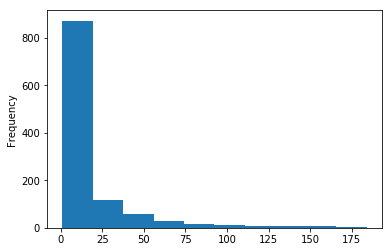

In [127]:
severity_2['location'].value_counts().plot.hist()

In [132]:
severity_2['location'].describe()

count    18552.000000
mean       623.556274
std        321.527222
min          1.000000
25%        373.000000
50%        673.000000
75%        893.000000
max       1126.000000
Name: location, dtype: float64

In [135]:
severity_2[['location','cnt']].groupby('location').agg(['sum'])

,cnt
,sum
location,
1,2415
2,253
3,10
4,45
5,1
6,3
7,2850
8,78


Text(0, 0.5, 'cnt')

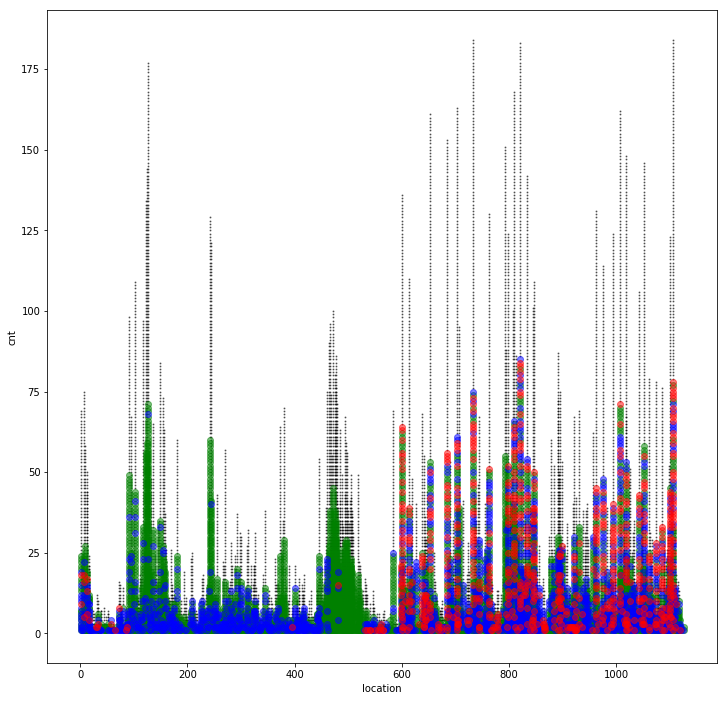

In [145]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(severity_2.loc[severity_2['fault_severity'].isnull(), 'location'], severity_2.loc[severity_2['fault_severity'].isnull(), 'cnt'], alpha=0.5, color='k',s=1)
ax.scatter(severity_2.loc[severity_2['fault_severity']==0, 'location'], severity_2.loc[severity_2['fault_severity']==0, 'cnt'], alpha=0.5, color='g')
ax.scatter(severity_2.loc[severity_2['fault_severity']==1, 'location'], severity_2.loc[severity_2['fault_severity']==1, 'cnt'], alpha=0.5, color='b')
ax.scatter(severity_2.loc[severity_2['fault_severity']==2, 'location'], severity_2.loc[severity_2['fault_severity']==2, 'cnt'], alpha=0.5, color='r')
ax.set_xlabel('location')
ax.set_ylabel('cnt')

Normalize count per location

In [149]:
severity_2['cnt_norm'] = severity_2.groupby('location')['cnt'].apply(lambda x: x/(x.max() + 1))

In [152]:
severity_2[severity_2['location']==1].head(5)

,fault_severity,location,severity_type,cnt,cnt_norm
id,,,,,
8011,0.0,1,2,1,0.014286
2588,0.0,1,1,2,0.028571
14595,1.0,1,2,3,0.042857
4848,0.0,1,1,4,0.057143
5259,0.0,1,1,5,0.071429


Plot the normalized data

Text(0, 0.5, 'normalized cnt')

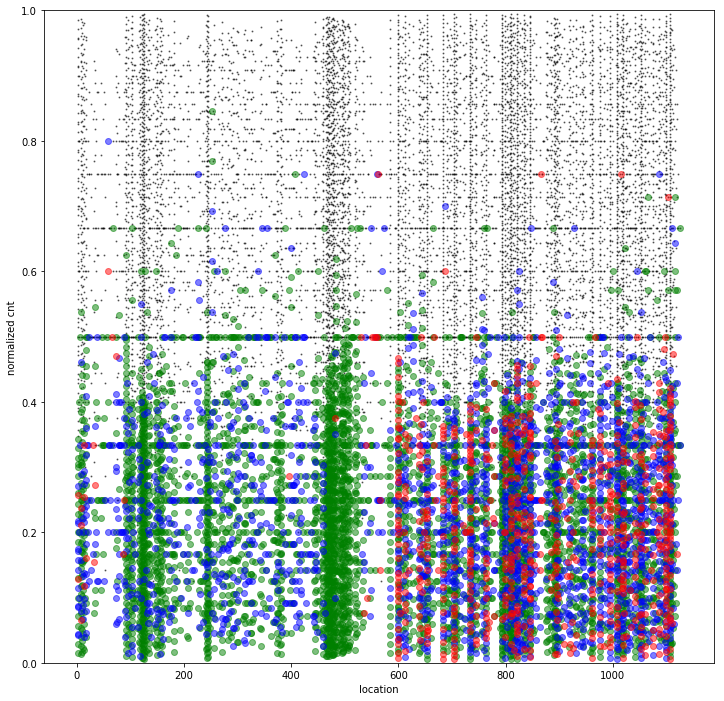

In [155]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(severity_2.loc[severity_2['fault_severity'].isnull(), 'location'], severity_2.loc[severity_2['fault_severity'].isnull(), 'cnt_norm'], alpha=0.5, color='k',s=1)
ax.scatter(severity_2.loc[severity_2['fault_severity']==0, 'location'], severity_2.loc[severity_2['fault_severity']==0, 'cnt_norm'], alpha=0.5, color='g')
ax.scatter(severity_2.loc[severity_2['fault_severity']==1, 'location'], severity_2.loc[severity_2['fault_severity']==1, 'cnt_norm'], alpha=0.5, color='b')
ax.scatter(severity_2.loc[severity_2['fault_severity']==2, 'location'], severity_2.loc[severity_2['fault_severity']==2, 'cnt_norm'], alpha=0.5, color='r')
ax.set_ylim(0,1)
ax.set_xlabel('location')
ax.set_ylabel('normalized cnt')

< 600 mostly greens

In [159]:
severity_2['location'].value_counts().index[:20]

Int64Index([1107,  734,  821,  126,  810,  704, 1008,  653,  684,  793, 1019,
            1052,  124,  834,  600,  122,  962,  763,  242,  798],
           dtype='int64')